In [1390]:
import pandas as pd

df = pd.read_csv('../dataset/IndianNamesUnique.csv')
names = df['Name'].str.lower().tolist()

In [1391]:
len(names)

60600

In [1392]:
df = pd.read_csv('../dataset/Indian_Names.csv')
names.extend(df['Name'].str.lower().tolist())

In [1393]:
print(f'Before: -> {len(names)}')
names = list(set(names))   # removed duplicates
print(f'After: -> {len(names)}')

Before: -> 67086
After: -> 64377


In [1394]:
has_nan = pd.isna(names).any()        # Works on list, array, anything!
print(has_nan)
nan_count = pd.isna(names).sum()
print(nan_count)

True
1


In [1395]:
# Remove NaN and clean
names = [
    str(name).strip() 
    for name in names 
    if pd.notna(name) and str(name).lower() != 'nan'
]

print("Clean list length:", len(names))

Clean list length: 64376


In [1396]:
# the shortest word/name
min(len(name) for name in names)

3

In [1397]:
max(len(name) for name in names)

24

In [1398]:
max(len(name) for name in names)
longest_name = max(names, key=len)
print("Longest name:", longest_name)

Longest name: devikarani;daevikaaraani


In [1399]:
# Finding names with ; in them
names_with_semicolon = [name for name in names if ';' in name]

print(len(names_with_semicolon))
print(names_with_semicolon)

3
['baijayanthi;', 'devikarani;daevikaaraani', 'baijayanti;']


In [1400]:
tmp = [part for name in names_with_semicolon for part in name.split(';') if part.split()]
print(tmp)

['baijayanthi', 'devikarani', 'daevikaaraani', 'baijayanti']


In [1401]:
names = [
        part.strip() 
        for name in names 
        for part in name.split(';') 
        if part.split()
    ]

In [1402]:
max(len(name) for name in names)

24

In [1403]:
max(len(name) for name in names)
longest_name = max(names, key=len)
print("Longest name:", longest_name)

Longest name: parthadhwajagrasamvasine


In [1404]:
# Get top 10 longest names with their lengths
top10_longest = sorted(names, key=len, reverse=True)[:10]

print("Top 10 Longest Names:")
for i, name in enumerate(top10_longest, 1):
    print(f"{i:2}. {name:<20} → {len(name)} characters")

Top 10 Longest Names:
 1. parthadhwajagrasamvasine → 24 characters
 2. jeyachandraramanthanan → 22 characters
 3. nishumbhashumbhahanani → 22 characters
 4. dooshanatrishirohantre → 22 characters
 5. rakshovidhwansakaraka → 21 characters
 6. dakshayajñavinaashini → 21 characters
 7. choudharynimeshnirmal → 21 characters
 8. nallanichakravarthula → 21 characters
 9. pattaambaraparidhaana → 21 characters
10. chandamundavinashini → 20 characters


In [1405]:
# We found a name: lllllllllllllllllll
import re

# Find names with 3+ repeated characters in a row
repeated_names = [name for name in names if re.search(r'(.)\1{2,}', name)] # look for characters repeating more than 2 times

print(f"Found {len(repeated_names)} names with 3+ repeated characters:")
for name in sorted(repeated_names, key=len, reverse=True)[:20]:
    print(f"  → '{name}'")

names = [name.strip() for name in names if not re.search(r'(.)\1{5,}', name)]

repeated_names = [name for name in names if re.search(r'(.)\1{2,}', name)] # look for characters repeating more than 2 times

print(f"Found {len(repeated_names)} names with 3+ repeated characters:")
for name in sorted(repeated_names, key=len, reverse=True)[:20]:
    print(f"  → '{name}'")


Found 12 names with 3+ repeated characters:
  → 'lllllllllllllllllll'
  → 'chandrahaaasini'
  → 'dharmaaalingam'
  → 'divyashreee'
  → 'garrepallli'
  → 'visaaalini'
  → 'sukhpreeet'
  → 'ritheeesh'
  → 'tohseeem'
  → 'roxannna'
  → 'heeera'
  → 'shreee'
Found 11 names with 3+ repeated characters:
  → 'chandrahaaasini'
  → 'dharmaaalingam'
  → 'divyashreee'
  → 'garrepallli'
  → 'visaaalini'
  → 'sukhpreeet'
  → 'ritheeesh'
  → 'tohseeem'
  → 'roxannna'
  → 'heeera'
  → 'shreee'


In [1406]:
# Get top 10 longest names with their lengths
top10_longest = sorted(names, key=len, reverse=True)[:10]

print("Top 10 Longest Names:")
for i, name in enumerate(top10_longest, 1):
    print(f"{i:2}. {name:<20} → {len(name)} characters")

Top 10 Longest Names:
 1. parthadhwajagrasamvasine → 24 characters
 2. jeyachandraramanthanan → 22 characters
 3. nishumbhashumbhahanani → 22 characters
 4. dooshanatrishirohantre → 22 characters
 5. rakshovidhwansakaraka → 21 characters
 6. dakshayajñavinaashini → 21 characters
 7. choudharynimeshnirmal → 21 characters
 8. nallanichakravarthula → 21 characters
 9. pattaambaraparidhaana → 21 characters
10. chandamundavinashini → 20 characters


In [1407]:
# Lets clean the data a bit
print(len(names))

names = [name for name in names if len(name)>2]            # remove names with length 2 or less

names.remove('s/o') if 's/o' in names else None                       # I have seen this in the list , so removed
names.remove('w/o') if 'w/o' in names else None

separators = ['/', '\\', '|', ';', '@', '.', '-', '&', '(', ')', '[', ']', ',']

# for sep in separators:
#     for name in names:
#             if sep in name:
#                 print(name) 
                

names = [part for name in names for part in name.split('/')]
names = [part for name in names for part in name.split('&')]
names = [part for name in names for part in name.split('(')]
names = [part for name in names for part in name.split(')')]
names = [part for name in names for part in name.split('[')]
names = [part for name in names for part in name.split(']')]

names = [name.strip('/').strip('.').strip('-').strip('&').strip('(').strip(')').strip('[').strip(']').strip(',') for name in names]


print(len(names))


64376
64386


In [1408]:
for sep in separators:
    for name in names:
            if sep in name:
                print(name) 

s.ram
md.parwez
s.bharathi
md.imran
mohd.ibraham
abdus-shaheed
as-salam
habib-ullah
vanaipaka-verindon
dvaraka-nayakaya
abdus-sameei
waal-baqi
abul-hassan
abdus-samad
hassam-ud-din
pan-it
abdus-salaam
abdus-sabour
abdus-shakur
iran-dokht
vag-devi
wa-al-mukheer
dharm-mitra


In [1409]:
# We notice that we have some words with . and - separators
# lets make all of them as one standard character '-'

names = [name.replace('.', '-') if '.' in name else name for name in names]

In [1410]:
for sep in separators:
    for name in names:
            if sep in name:
                print(name) 

abdus-shaheed
as-salam
habib-ullah
vanaipaka-verindon
s-ram
dvaraka-nayakaya
abdus-sameei
md-parwez
waal-baqi
s-bharathi
abul-hassan
md-imran
abdus-samad
mohd-ibraham
hassam-ud-din
pan-it
abdus-salaam
abdus-sabour
abdus-shakur
iran-dokht
vag-devi
wa-al-mukheer
dharm-mitra


In [1411]:
print(len(names))

nums = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]
for sep in nums:
    # names = [part.strip() for name in names for part in name.split(sep)]
    for name in names:
            if sep in name:
                print(name) 
                names = [part.strip() for name in names for part in name.split(sep)]

names.remove('dakshayajñavinaashini') if 'dakshayajñavinaashini' in names else None
names.append('dakshayajnavinaashini')
# I noticed that ñ character occurs only once in the entire dataset, so just replaced with n

print(len(names))

64386
km0
moh0
al0k
shi8vprakash
64390


In [1412]:
short_names = [name for name in names if len(name)<4]
print(short_names)
print(len(short_names))

# I see that a small portion of the dataset (262 entries) have length of 3 or  less and there are a lot of confusing strings, better to remove them
# I know that we have a lot of Indian names with length 3 like Jay, Nag, Dev, etc. but I am removing them from the scope

names = [name for name in names if len(name)>3]

['mod', 'eha', 'dua', 'anl', 'vvs', 'nit', 'niv', 'liz', 'ved', '', 'sad', 'iti', 'rma', 'gur', 'lay', 'ina', 'aly', 'ena', 'zia', 'abu', 'mum', 'sus', 'har', 'tek', 'era', '', '', 'jay', 'mrs', 'ari', 'deb', 'not', 'anu', 'jya', 'km', '', 'mia', 'fra', 'gaj', 'ana', 'dev', 'ami', 'aas', 'jae', 'moh', '', 'esh', 'atu', 'aar', 'nil', 'amy', 'bel', 'sam', 'ben', 'gen', 'shi', 'uva', 'eta', 'ram', 'rup', 'nal', 'var', '', 'mou', 'abi', 'mul', 'ela', 'aan', 'luv', 'gia', 'yuj', 'ras', 'ati', 'ahd', 'jia', 'ada', 'oni', 'das', 'ria', 'ava', '', 'aru', 'iza', 'het', 'zev', 'yog', 'aju', 'udi', 'inu', 'jat', 'tim', 'tom', 'jey', 'ria', 'jai', 'ara', 'mal', 'bud', 'rag', 'jui', 'ann', 'ray', 'nij', 'oli', 'eka', 'rao', 'sen', 'dyu', 'ark', 'moh', 'sri', 'des', 'jil', 'dam', 'jal', 'mam', 'one', 'iri', 'raj', 'mem', 'dip', 'son', 'pav', 'lal', 'alu', 'ori', 'rev', 'bir', 'gya', 'pon', 'ovi', 'lai', 'mat', 'aja', 'ali', 'nik', 'tak', 'git', 'bal', 'yug', 'oha', 'vin', 'mir', 'oma', 'edi', 'van',

In [1413]:
print(len(names))

64128


Till now we were able to get the dataset and clean the data for our consumption.

After this, we will get into the design of our makemore model.

Lets us take an example: "abhishek"
This example suggests us:
1. The character 'a' has a high likelihood of coming 1st in the sequence of a name
2. The character 'b' is likely to come after the character 'a'
3. The character 'h' is likely to come after 'a', 'b'
4. The character 'i' is likely to come after 'a', 'b', 'h'
5. And so on till 'k' following 'a','b','h','i','s','h','e'
6. Another piece of information that is packed in this example is: the sequence of characters ends after 'k': 'abhishek' 

Likewise we have another 60k+ examples in our dataset which our language model needs to understand.

Lets get started with the bigram language model

### Bigram Language Model

In a bigram language model, we are just working with 2 characters at a time. We would look at one character which is given and we are interested to predict the next character in the sequence.
Example: what characters are likely to follow the character 'a'
or, what characters are likely to follow the character 'r'

We are interested to model this kind of a local structure, generally forgetting that there would some more information in the overall sequence. We are only interested in the previous character to predict the next one.

In this way, it is a very weak and simple language model; but it is a great place to start.

Lets try to check the bigrams in our dataset

In [1414]:
for name in names[:1]:
     print(name)
     for i in range(len(name)):
          print(name[i:i+1], name[i+1:i+2] )
     

jyotirmoy
j y
y o
o t
t i
i r
r m
m o
o y
y 


In [1415]:
# Another cute way of achieving the same as above 
for name in names[:1]:
    print(name)
    for ch1, ch2 in zip(name, name[1:]):        # ch = character
        print(ch1, ch2)

jyotirmoy
j y
y o
o t
t i
i r
r m
m o
o y


As discussed above, we also need to extract the information like, which character is highly likely to be the 1st character and the last character
So modifying the code to hold those information as well
We will introduce special characters 'chs' to hold the start token of a sequence (name) denoted by `<S>`, which would denote a special start character and `<E>` which would be a special end character
So our name would be represented as `<S>jyotirmoy<E>`

In [1416]:
w = '<S>' + names[1] + '<E>'
e = ['<S>'] + list(names[1]) + ['<E>']
print(f'w is : {w} and its type is {type(w)}')
print(f'e is : {e} and its type is {type(e)}')

# check this block to understand the below block
# name is a string object, but list(name) will be a list of individual characters of name

w is : <S>ilamuhil<E> and its type is <class 'str'>
e is : ['<S>', 'i', 'l', 'a', 'm', 'u', 'h', 'i', 'l', '<E>'] and its type is <class 'list'>


In [1417]:
for name in names[:1]:
    chs = ['<S>'] + list(name) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):        # to store the information of start and end characters of a name
        print(ch1, ch2)

<S> j
j y
y o
o t
t i
i r
r m
m o
o y
y <E>


`<S>j` :-> is the bigram of the special j character which is the start of a name

`y<E>` :-> is the bigram of the special y character which is the end of a name

In order to learn the statistics of which character are likely to follow other characters, the simplest way in the Bigram language model is by **counting**.
We will simply count the number of occurances of the individual bigrams in the entire dataset, which we can do by a simple dictionary (lets use the name b for this dictionary)

In [1418]:
import random 

b = {}

random.seed(2147483647)                 # to get the same results everytime
random.shuffle(names)

for name in names[:3]:
    chs = ['<S>'] + list(name) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1        # b.get(bigram, 0) returns 0 by default (if it is not already present)
        print(ch1,ch2)


<S> a
a b
b h
h i
i n
n a
a n
n d
d h
h a
a n
n <E>
<S> r
r i
i t
t s
s i
i k
k a
a <E>
<S> k
k a
a r
r u
u r
r <E>


In [1419]:
b

{('<S>', 'a'): 1,
 ('a', 'b'): 1,
 ('b', 'h'): 1,
 ('h', 'i'): 1,
 ('i', 'n'): 1,
 ('n', 'a'): 1,
 ('a', 'n'): 2,
 ('n', 'd'): 1,
 ('d', 'h'): 1,
 ('h', 'a'): 1,
 ('n', '<E>'): 1,
 ('<S>', 'r'): 1,
 ('r', 'i'): 1,
 ('i', 't'): 1,
 ('t', 's'): 1,
 ('s', 'i'): 1,
 ('i', 'k'): 1,
 ('k', 'a'): 2,
 ('a', '<E>'): 1,
 ('<S>', 'k'): 1,
 ('a', 'r'): 1,
 ('r', 'u'): 1,
 ('u', 'r'): 1,
 ('r', '<E>'): 1}

So we saw the pattern for small subset of the dataset, now lets do it for the entire dataset

In [1420]:
b = {}
for name in names:
    chs = ['<S>'] + list(name) + ['<E>']

    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [1421]:
from pprint import pprint 

pprint(dict(list(b.items())[:10]))           # printing 10 items of the list

{('<S>', 'a'): 7252,
 ('a', 'b'): 1835,
 ('a', 'n'): 27770,
 ('b', 'h'): 1627,
 ('d', 'h'): 3375,
 ('h', 'a'): 19966,
 ('h', 'i'): 8916,
 ('i', 'n'): 6000,
 ('n', 'a'): 9043,
 ('n', 'd'): 2655}


In [1422]:
# To check the maximum occurances of bigram patterns
# dictionary .item() returns list of key value pairs together
# If we apply sort on it, by default the sorting is on the key
# to sort on the values (which in our case is the count of our bigrams), we would do 

sorted(b.items(), key = lambda kv: -kv[1])[:10]


[(('a', 'n'), 27770),
 (('h', 'a'), 19966),
 (('a', '<E>'), 19034),
 (('s', 'h'), 16019),
 (('t', 'h'), 15785),
 (('n', '<E>'), 14264),
 (('a', 'r'), 12451),
 (('r', 'a'), 12191),
 (('i', '<E>'), 10806),
 (('n', 'a'), 9043)]

From the above result we observe that:
1. Character 'n' follows character 'a' for most of the times
2. `('a', '<E>'), 19069` shows that the character 'a' is the most ending characters for names

Also, it would be convinient for us to store this data (the b{} dictionary) in a 2-D array instead of dictionary for the purpose of operating on the data - **tensors**

We will use pytorch

Tensors allows us to manipulate the data and entries quite efficiently

In [1423]:
import torch

#playing with tensors
a = torch.zeros((3, 5))
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [1424]:
a.dtype

torch.float32

In [1425]:
# But our data has counts in it, so we would be keeping the data type as int
a = torch.zeros((3, 5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [1426]:
a[1, 3] += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

We will store the content of our bigram in a 2-D tensor, such that
1. The rows will have the first character of the bigram
2. The columns will have the second character of the bigram
3. Each entry in the 2-D tensor will tell us the number of occurances of the second character follows the first character (column character follows the row character)

In all, we have 28 characters: 26 characters of alphabet and '<S>' and '<E>'

a[row, col] = 2; means the character at col follows the character at row 2 times in the dataset

In [1427]:
tmp = names[:3]
print(set(''.join(tmp)))

# using the above logic, we will take all the characters in our dataset and have unique characters (set)

{'i', 'b', 'd', 'r', 'h', 'a', 'k', 's', 'n', 'u', 't'}


In [1428]:
# creating a lookup table for having a corresponding int value for our characters in dataset
chars = sorted(list(set(''.join(names))))
stoi = {s:i for i, s in enumerate(chars)}

In [1429]:
stoi

{'-': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [1430]:
stoi['<S>'] = 27
stoi['<E>'] = 28

In [1431]:
N = torch.zeros((29, 29), dtype=torch.int32)  # initializing the array with 0s

In [1432]:
for name in names:
    chs = ['<S>'] + list(name) + ['<E>']

    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]
        N[row, col] += 1

In [1433]:
# Lets cross verify the above tensor with ('a', 'n'), 27770) as obtained above
N[1, 14]

tensor(27770, dtype=torch.int32)

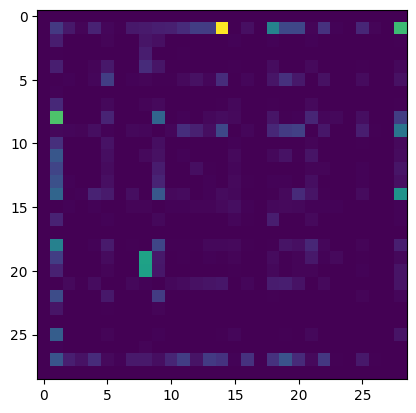

In [1434]:
# Lets Visualize this tensor
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)


In [1435]:
# Lets make it a bit more understandable
# Lets generate another dictionary which gives the corresponding integer value of a character in our dataset

itos = {i:s for s, i in stoi.items()}
itos

{0: '-',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 27: '<S>',
 28: '<E>'}

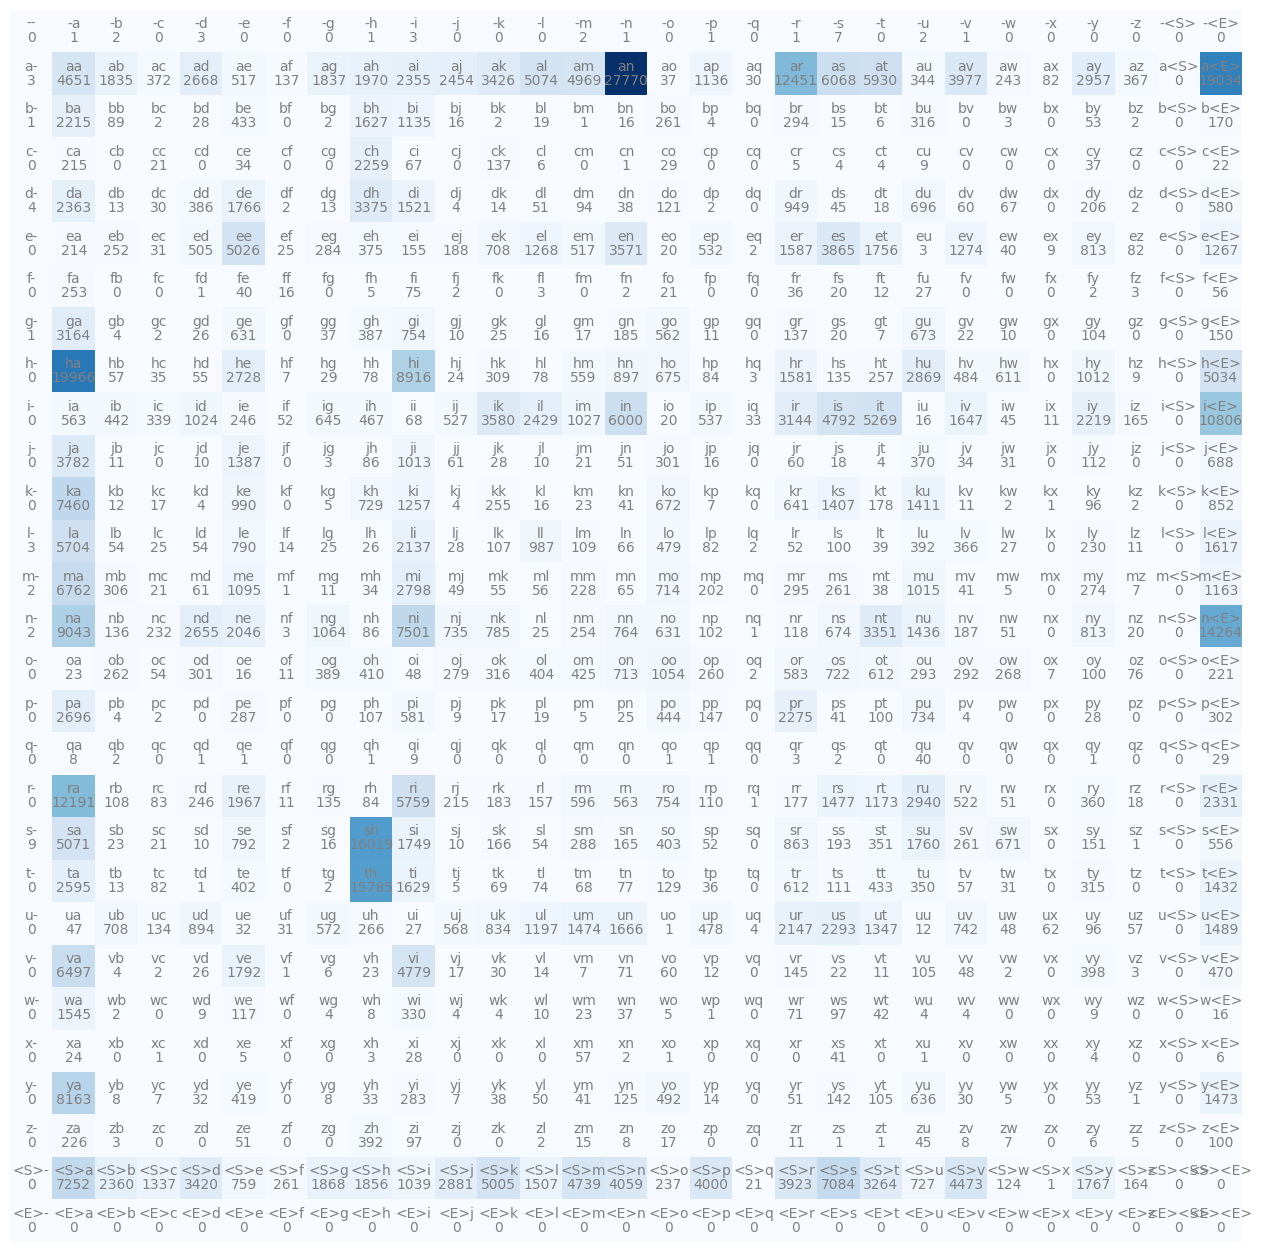

In [1436]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(29):
    for j in range(29):
        chstr = itos[i] + itos[j]        # for every row col pair, create the bigram
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray')               # N[row, col] is of a tensor type: item() will give the entry value

plt.axis('off');

From the above visualization , we can see that the entire row of N starting with `<E>` is 0
Thats because, if we have defined `<E>` to be the end character, then how can it appear before any other character. It should always occur after any character.
So the form `<E>_` will always be zero : Going by the definition of name: `name = <S> + name + <E>`

Similary, no bigram will have the second character as `<S>` so the entire column of `<S>` is zero

We will not have 2 different special tokens for storing start and end of a name. We will only have 1 token.

We will user '.' as the special character to denote beginning and end of a name. 

In [1437]:
N = torch.zeros((28,28), dtype=torch.int32)
chars = sorted(list(set(''.join(names))))

# We will offset each character by 1 so that we can put '.' special character at 0
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [1438]:
stoi

{'-': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27,
 '.': 0}

In [1439]:
# Rebuilding the tensor again with the new special character
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]
        N[row, col] += 1

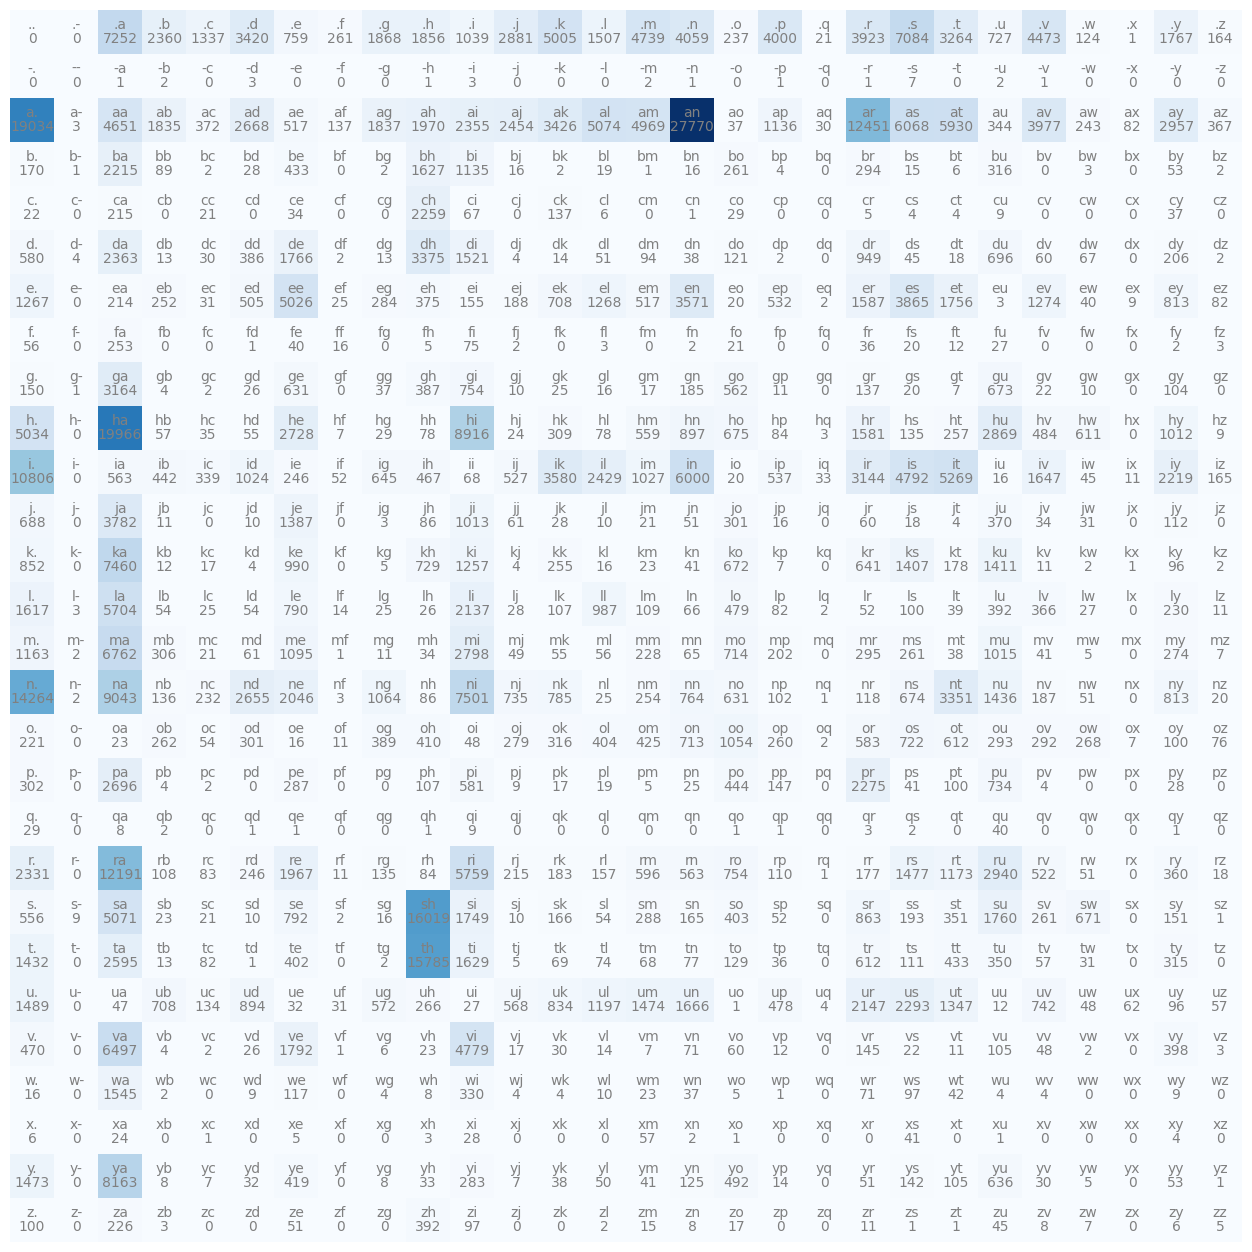

In [1440]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]        # for every row col pair, create the bigram
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray')               # N[row, col] is of a tensor type: item() will give the entry value

plt.axis('off');

### Sampling Meaning
Before going further, let us understand the meaning of sampling from a dataset.
Assume, that we have a list of characters: M = ['a', 'b', 'c', 'd', 'e']
And we also have the probabilities of occurances of these characters : P = [0.5, 0.3, 0.1, 0.0, 0.1]

sum(P) = 1.0  - > the probabilities are correct

The probability array P, tells us that if we try to pick any random character from the list M, there is a 50% chance of the character 'a' to be picked, 30% chance that it will be 'b' and almost 0 chance of 'd' getting picked.

Sampling 2 characters with replacement means: First we pick one character and put it back to the array (so as not to disturb the probabilities) and then pick the second character.

Why replacement matters : \
When the original character array = ['a', 'b', 'c', 'd', 'e'], \
then the corresponding probabilities are  = [0.5, 0.3, 0.1, 0.0, 0.1] \

If we pick one character from M and do not put it back, then the dataset itself changes and that will affect the probabilities.\
Lets pick one character 'a', this would leave us with M = ['b', 'c', 'd', 'e'] and this will change the probabilities of each character to be picked, so this will affect the choice of the second character.

Thats why we are looking for choosing a character as per its probability without affecting any other choices of ours subsequently.

In our case, N is the counts array of our entire dataset.
This array has all the necessary information for us to sample from this **Bigram Character Level Language Model**.

We are going to follow the probabilities (counts) and we are going to start sampling from the model.

To begin with we will start with the . (in this case it will be the first starting character) and we will look into the entire row ( the first row ). This row will tell us about all the characters and how often are the names starting with those characters in the first row

In [1441]:
#Lets see the first row, to check all the characters and how many names start with those characters
N[0]

tensor([   0,    0, 7252, 2360, 1337, 3420,  759,  261, 1868, 1856, 1039, 2881,
        5005, 1507, 4739, 4059,  237, 4000,   21, 3923, 7084, 3264,  727, 4473,
         124,    1, 1767,  164], dtype=torch.int32)

In [1442]:
# The above are raw counts and we need to convert them to probabilities
# We need to normalize the counts -> hence we will first convert the numbers to float
# Because we will be storing the probabilities in p, which would be floating point numbers

p = N[0].float()

# Normalize the counts into probabilities
# To calculate the probability
p /= p.sum()

p

tensor([0.0000e+00, 0.0000e+00, 1.1309e-01, 3.6801e-02, 2.0849e-02, 5.3331e-02,
        1.1836e-02, 4.0700e-03, 2.9129e-02, 2.8942e-02, 1.6202e-02, 4.4926e-02,
        7.8047e-02, 2.3500e-02, 7.3899e-02, 6.3295e-02, 3.6957e-03, 6.2375e-02,
        3.2747e-04, 6.1175e-02, 1.1047e-01, 5.0898e-02, 1.1337e-02, 6.9751e-02,
        1.9336e-03, 1.5594e-05, 2.7554e-02, 2.5574e-03])

The above tensor is giving us the probability of each character to be the first character of a name

In [1443]:
p.sum()

tensor(1.)

Above shows that the sum of probabilities is 1 , which should be the case.
Now, we can try to sample from this distribution.

To sample from this distribution, we will use **Torch.Multinomial**

### Torch.Multinomial
It samples from the multinomial probability distribution: In easy terms: You give me probabilities and I will give you integers which are sampled according to their probability distribution.

And to make the sampling deterministic, we will use a **Generator Object** in pytorch -> to get the same sampling everytime

In [1444]:
# Deterministic way of creating a torch generator object
# Seeding it with some number which we can all agree upon -> so that it seeds a generator and gives an object 'g'

g = torch.Generator().manual_seed(2147483647)

# then we can pass this g to a function that creates random numbers; 3 of them in our case below, using the generator object g, as the source of ramdomness
p_tmp = torch.rand(3, generator=g)

p

tensor([0.0000e+00, 0.0000e+00, 1.1309e-01, 3.6801e-02, 2.0849e-02, 5.3331e-02,
        1.1836e-02, 4.0700e-03, 2.9129e-02, 2.8942e-02, 1.6202e-02, 4.4926e-02,
        7.8047e-02, 2.3500e-02, 7.3899e-02, 6.3295e-02, 3.6957e-03, 6.2375e-02,
        3.2747e-04, 6.1175e-02, 1.1047e-01, 5.0898e-02, 1.1337e-02, 6.9751e-02,
        1.9336e-03, 1.5594e-05, 2.7554e-02, 2.5574e-03])

p above has numbers between 0 and 1, that are random according to the seed that we decided and whenever we run the above cell, we will get always the same result.
So everytime we run the above cell, we should get the result : `tensor([0.6064, 0.3033, 0.0903])`

In [1445]:
# If we normalise the above result, we will get the probability distribution of those 3 elements
p_tmp /= p_tmp.sum()
p_tmp

tensor([0.6064, 0.3033, 0.0903])

In [1446]:
#Now we can use torch.multinomial to draw samples from it
torch.multinomial(p_tmp, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

The above is a way to generate random sample which has 20 data points.

when we did 
$$ 
p = torch.rand(3, generator=g) \
p /= p.sum()
$$

and we received `tensor([0.6064, 0.3033, 0.0903])`

It means that when we draw out numbers in our sample, 
1. 0 (the first index), should have 60.64% occurances
2. 1 (the second index), should have 30.33% occurances
3. 2 (the third index), should have 9.03$ occurances

In other words, if we draw 10 numbers in our sample, then we should have approx. 6 occurances of 0's, 3 occurances of 1's and only 1 occurance of 2.

When we ran $ torch.multinomial(p, num_samples=20, replacement=True, generator=g) $; we saw 
* 9 occurances of 0's
* 9 occurances of 1s
* 2 occurances of 2's

It is advisable to generate more number of sample numbers so as to get more closer to the probabilities.

As per our probability : `tensor([0.6064, 0.3033, 0.0903])`
In the sample dataset, we should have approx. 60% 0's, half of them as 1's and 3 times as few 2's
If x is the number of 0's
then number of 1's should be approx. y = x/2
and number of 2's should be approx. z = y/3


Now, lets again sample our own names dataset.
We will sample only 1 character from the dataset - which will be the first character of our guessed name.

In [1447]:
p = N[0].float()

# To calculate the probability
p /= p.sum()

g = torch.Generator().manual_seed(2147483647)

index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(f'Sampled index : {index}')
print(f'Sampled Character : {itos[index]}')
print(f'Probability of the chosen character : {p[index]}')

Sampled index : 20
Sampled Character : s
Probability of the chosen character : 0.11046656966209412


From the above cell's results, we drew the character 's' as our first character of the name.
And if we look in to our dataset, N, and its first row, (since we started with the first row and its probabilities), we can observe that 'a' and 's' are most likely characters to be picked.

Now, we will pick the next character based on its prability given that the first character is 's'. \
So we will look into the row of 's'

In [1448]:
p_sec_char = N[20].float()
p_sec_char /= p_sec_char.sum()

p_sec_char

tensor([1.8748e-02, 3.0347e-04, 1.7099e-01, 7.7553e-04, 7.0810e-04, 3.3719e-04,
        2.6705e-02, 6.7438e-05, 5.3950e-04, 5.4014e-01, 5.8974e-02, 3.3719e-04,
        5.5973e-03, 1.8208e-03, 9.7110e-03, 5.5636e-03, 1.3589e-02, 1.7534e-03,
        0.0000e+00, 2.9099e-02, 6.5077e-03, 1.1835e-02, 5.9345e-02, 8.8006e-03,
        2.2625e-02, 0.0000e+00, 5.0915e-03, 3.3719e-05])

In [1449]:
index2 = torch.multinomial(p_sec_char, num_samples=1, replacement=True, generator=g).item()

print(f'Sampled second index : {index2}')
print(f'Sampled second Character : {itos[index2]}')
print(f'Probability of the chosen second character : {p_sec_char[index2]}')

Sampled second index : 9
Sampled second Character : h
Probability of the chosen second character : 0.540142297744751


From the above , the sampling chose the character 'h' when we had the first character as 's'
This signifies that the probability of 'h' following 's' is high.\
Now lets make a complete name

In [1450]:
index = 0

g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    guess = []

    while True:           
        p = N[index]/(N[index].sum())

        index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        guess.append(itos[index])
        
        if index == 0:         #stop iterating when . (ending character is encountered): itos[0] = '.'
            break

    print(''.join(guess))


shuvaratheeiyan.
thandan.
nk.
lariraneyatin.
m.
nihithmbrveir.
dashakeeshakan.
saa.
riruma.
dainanan.
grthetthaa.
rishtanmi.
anamash.
dharahayive.
maveideshol.
khaman.
ma.
visamusamowatha.
ja.
disuladhhanavinjanaskenudha.


If we notice, these do not look convincing names. Very few generated names look close enough to be a real name (even though these cannot be used as proper names :P)
The reason of such output is bigram is a very basic model. Like if we look at the generated names, one of the names it generated is 'h.'

The model does not know that the 'h' in 'h.' is the very first 'h'. All the model does is look at the recently generated character, 'h' and samples the very likely character after h and finds that it is likely to be the last character.

But having said this, it is far more better in terms of at least getting the relationship between the characters. It is at least trained in a way that it has some justification to choose a character once it sees a character.

Just compare it to the model, which has no context of this information (about the preferences of chosing from trained sequences of the character)

Lets see how a uniform distribution generates names for us. \
**Uniform Distribution** has no special information about the character set. For a uniform distribution, each character is equally likely. Every character has the same probability of occurance

In [1451]:

g = torch.Generator().manual_seed(2147483647)

for i in range(10):

    index = 0
    guess = []

    while True:
        

        p = torch.ones(28)
        p = p / p.sum()   # All 29 characters have the same probability to occur

        index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

        guess.append(itos[index])

        if index == 0:
            break

    print(''.join(guess))



bcuvhezzdb-iyvo.
-hc-nsqyok.
lhqprcgjcatznxw.
njhzlhm-rvbirzdmg-gkppx-ykpg.
s-u.
.
zauecmdxfzaebcbgrtdextjqaori-gtaqmicxgwmbsjgdxdyahfyiv-.
mnveidksbol.
qkamhbpmvcvpjemn-ccpwq-yjdjwqwxmulzdhhxzrvi-jsvoskenudbqzjfxfqzypjryznvodhirg-yll.
nqax.


The above cell result shows, how much better is our bigram character language model is.

Also, we would like to improve the efficiency of our model a bit.\
At every iteration, we are calculating the below:

`p = N[0]` \
`p /= p.sum()`


And this could be improvised. We can change create a new tensor which stores the probabilities of each cell of the probability matrix.

Also, for efficiency, we would employ certain tensor manipulation operations.

Another note to mention:

`P /= P.sum()` is more memory efficient than `P = P / P.sum()`

`P /= P.sum()` performs the operation in memory in place where as `P = P / P.sum()` creates a new variable and memory holder

In [1452]:
P_tmp = torch.zeros((28,28), dtype=torch.float)
print(P_tmp.shape)
for row in range(28):
    row_sum = N[row].sum()
    for col in range(28):
        P_tmp[row][col] = N[row][col] / row_sum

# print(P_tmp)
print(P_tmp.shape)

torch.Size([28, 28])
torch.Size([28, 28])


In [1453]:
# The above could be achieved by below

P = N.float()
print(P.shape)

# dim = 0 below means we are doing the sum of elements in each column and storing them
print(P.sum(dim=0, keepdim=True).shape)
print(P.sum(dim=0, keepdim=True))


# But we need to do the sum of each row 
print(P.sum(dim=1, keepdim=True).shape)
print(P.sum(dim=1, keepdim=True))
# print(P)


torch.Size([28, 28])
torch.Size([1, 28])
tensor([[6.4128e+04, 2.5000e+01, 1.1269e+05, 6.7100e+03, 2.8500e+03, 1.2420e+04,
         2.4369e+04, 5.7400e+02, 6.9550e+03, 4.6492e+04, 4.6113e+04, 8.0970e+03,
         1.6093e+04, 1.3526e+04, 1.5559e+04, 4.6979e+04, 8.1410e+03, 7.8270e+03,
         9.9000e+01, 3.2212e+04, 2.9657e+04, 2.4308e+04, 1.7226e+04, 1.4545e+04,
         2.3420e+03, 1.7300e+02, 1.2216e+04, 9.9500e+02]])
torch.Size([28, 1])
tensor([[6.4128e+04],
        [2.5000e+01],
        [1.1269e+05],
        [6.7100e+03],
        [2.8500e+03],
        [1.2420e+04],
        [2.4369e+04],
        [5.7400e+02],
        [6.9550e+03],
        [4.6492e+04],
        [4.6113e+04],
        [8.0970e+03],
        [1.6093e+04],
        [1.3526e+04],
        [1.5559e+04],
        [4.6979e+04],
        [8.1410e+03],
        [7.8270e+03],
        [9.9000e+01],
        [3.2212e+04],
        [2.9657e+04],
        [2.4308e+04],
        [1.7226e+04],
        [1.4545e+04],
        [2.3420e+03],
      

If you notice above, the sum of cols or sum of rows are identical.
That is because we have the bigram matrix in such a way that the sum across the rows horizontally and sum across the columns vertically are identical.

But we need to keep the sum across the rows horizontally

### Broadcasting in Pytorch

An operation on 2 tensors are broadcastable if 
1. Each tensor has at least one dimension
2. When iterating over the dimension sizes, starting at the trailing dimension (from the right most dimension), the dimension sizes must either be equal, 1 or one of them does not exist

when we do P = N.float()

`Dimensions of P = [28 x 28]` \
`Dimensions of Q = P.sum(1, keepdim = True) = [28 x 1]`

When we start from the right most dimensions : P has 28 and Q has 1 -> one of them is 1 ( aligns with the definition) \
going further P has 28 and Q has 28 -> both are equal

So division operation is **broadcastable** over the two tensors.

pytorch will take the Q vector : [28 x 1] and stretches it out to [28 x 28] by creating copies of the column vector

In [1454]:
P /= P.sum(dim=1, keepdim=True)
P.shape

torch.Size([28, 28])

The above should normalize the P tensor in such a way that each row has the probability of characters following the character in that row.
We can check this , if we have the sum of all the rows individually 1

In [1455]:
P[0].sum()

tensor(1.)

In [1456]:
# Guessing the name in more performant way

g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    index = 0
    guess = []

    while True:
        index = torch.multinomial(P[index], num_samples=1, replacement=True, generator=g).item()
        guess.append(itos[index])

        if index == 0:
            break
    print(''.join(guess))

shuvaratheeiyan.
thandan.
nk.
lariraneyatin.
m.
nihithmbrveir.
dashakeeshakan.
saa.
riruma.
dainanan.


P matrix, which stores the probabilities of occurances of characters given a previous character, is the parameter of the **Bigram Character Language Model**
When we train the model, we are building the probability matrix which helps us to sample the characters using the model.

Now let's evaluate the quality of this model: by summarizing the quality of this model into a single number -> which will tell us, how good is this model in predicting the next character from our training dataset, using the loss value.

In [1457]:
for name in names[:3]:
    print(name)
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        # Check the probability that the model assigns to this bigram
        prob = P[row, col]
        print(f'{ch1}{ch2}: {prob: .4f}')




abhinandhan
.a:  0.1131
ab:  0.0163
bh:  0.2425
hi:  0.1918
in:  0.1301
na:  0.1925
an:  0.2464
nd:  0.0565
dh:  0.2717
ha:  0.4295
an:  0.2464
n.:  0.3036
ritsika
.r:  0.0612
ri:  0.1788
it:  0.1143
ts:  0.0046
si:  0.0590
ik:  0.0776
ka:  0.4636
a.:  0.1689
karur
.k:  0.0780
ka:  0.4636
ar:  0.1105
ru:  0.0913
ur:  0.1246
r.:  0.0724


The above cell tells us the probability of each bigram that it used to select the next character.

If every character had the same probability to be chosen, then the probability of each bigram would have been : `1/29 = 0.03448`

And the bigrams that our model has chosen, some of them have probabilities as high as 0.4636\
This means that we have some extra information about the sequences. However, we expect the probabilities to be as close as 1.0 for our model to be more accurate.

How can we summarize these probabilities into a single number, that measures the quality of extent to which our model is predicting the next character given the previous character.

We can use this quantitative measure on our training set, to train the model and make it better.

### Maximum Likelihood Estimation (MLE)
Likelihood is the product of all the probabilities, which tells us about the probability of the entire dataset assigned by the model that we have trained. This can be used as the measure of the quality of our model.

And as we discussed earlier, each probability of the bigram should be as close to 1 as possible, then the product of all the probabilities should be as high as possible for a better model.

But, since the probabilities are too small numbers (`<= 1 and >= 0`), there product would be much lower number.

Hence, we use **LOG of Likelihood**

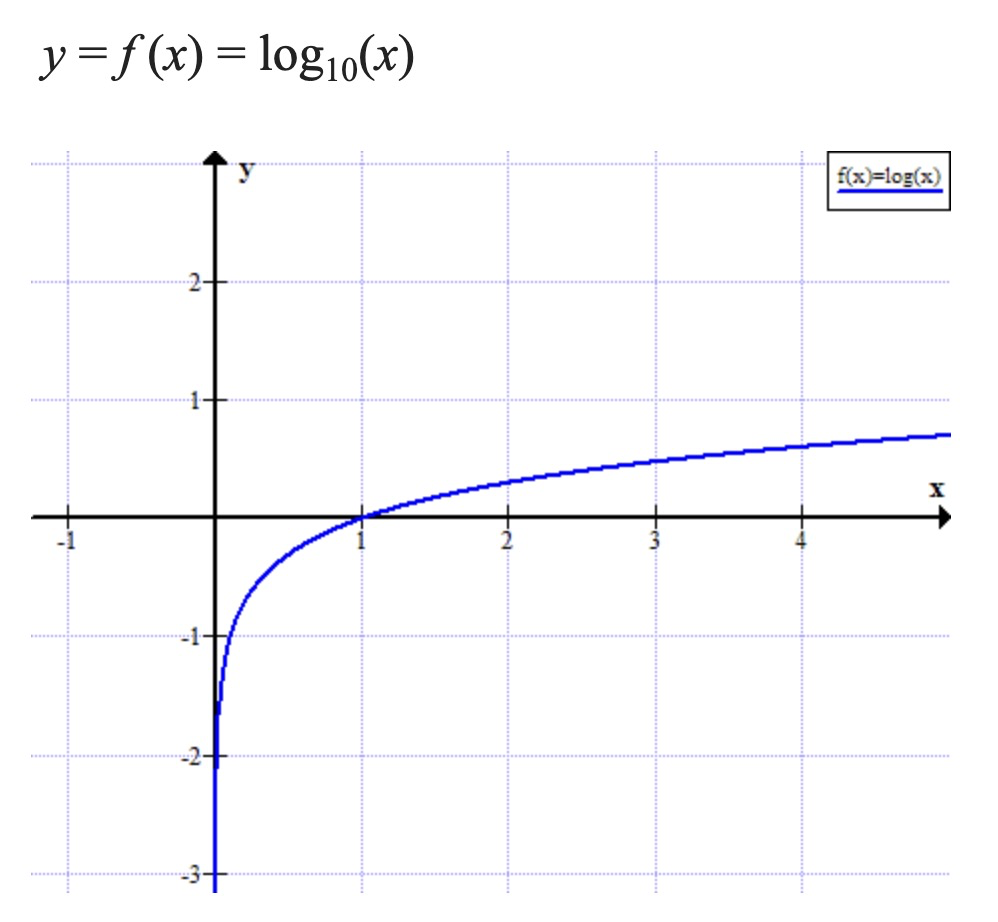

As we all know, the value of log function is 0 at 1 and it goes to - infinity when approaching to 0

In [1458]:
for name in names[:2]:
    print(name)
    chs = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        prob = P[row, col]
        logprob = torch.log(prob)

        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

abhinandhan
.a:  0.1131 -2.1796
ab:  0.0163 -4.1176
bh:  0.2425 -1.4169
hi:  0.1918 -1.6514
in:  0.1301 -2.0393
na:  0.1925 -1.6477
an:  0.2464 -1.4007
nd:  0.0565 -2.8733
dh:  0.2717 -1.3029
ha:  0.4295 -0.8452
an:  0.2464 -1.4007
n.:  0.3036 -1.1920
ritsika
.r:  0.0612 -2.7940
ri:  0.1788 -1.7216
it:  0.1143 -2.1693
ts:  0.0046 -5.3890
si:  0.0590 -2.8307
ik:  0.0776 -2.5557
ka:  0.4636 -0.7688
a.:  0.1689 -1.7784


If we consider the above results:

`ha:  0.4295 -0.8452` -> for `abhinandhan`

and 

`ts:  0.0046 -5.3890` -> for `ritsika`


We see that, the better the probability (0.4295 in case of `ha`), the closer the log of probability to 0 (-0.8452) as compared to -5.389 for 0.0046 in case of `ts`

So the advantages of using log of probabilities :
1. It can be used to see quantitatively, how good is a probability of choosing a character
2. When we discussed about having one single number to measure the quality of the model, we mentioned to take the product of the probabilities:

    ```
    if we have a, b, c as probabilities and if we compute the log(a), log(b), log(c),
    then (a*b*c) becomes log(a) + log(b) + log(c)
    ```

### Log Likelihood
We can simply add the log of probabilites to get to the number which can tell us about the quality of our model, how good or bad it is.

In [1459]:
log_likelihood = 0.0

for name in names[:2]:
    print(name)
    chs = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        prob = P[row, col]
        log_prob = torch.log(prob)

        log_likelihood += log_prob

        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')

abhinandhan
.a:  0.1131 -1.7784
ab:  0.0163 -1.7784
bh:  0.2425 -1.7784
hi:  0.1918 -1.7784
in:  0.1301 -1.7784
na:  0.1925 -1.7784
an:  0.2464 -1.7784
nd:  0.0565 -1.7784
dh:  0.2717 -1.7784
ha:  0.4295 -1.7784
an:  0.2464 -1.7784
n.:  0.3036 -1.7784
ritsika
.r:  0.0612 -1.7784
ri:  0.1788 -1.7784
it:  0.1143 -1.7784
ts:  0.0046 -1.7784
si:  0.0590 -1.7784
ik:  0.0776 -1.7784
ka:  0.4636 -1.7784
a.:  0.1689 -1.7784
log_likelihood=tensor(-42.0749)


How much variance could be there in log_likelihood?

When all the probabilities are 1 -> the best model, then the log_probability = 0 \
and when all the probabilities are 0 -> the worst model, then the log_probability = -infinity

But to use a metric as loss function, we needed the below properties:
1. Low loss => better model
2. High loss => worse model

In our case, 0 log_probability (higher compared to -infinity) is the best model and vice versa.

Hence, we will inverse the log_likelihood value, as **Negative Log Likelihood (nll)**

In [1460]:
log_likelihood = 0.0

for name in names[:2]:
    print(name)
    chs = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(name, name[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        prob = P[row, col]
        log_prob = torch.log(prob)

        log_likelihood += log_prob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')

nll = -log_likelihood

print(f'{nll=}')

abhinandhan
ab:  0.0163 -1.7784
bh:  0.2425 -1.7784
hi:  0.1918 -1.7784
in:  0.1301 -1.7784
na:  0.1925 -1.7784
an:  0.2464 -1.7784
nd:  0.0565 -1.7784
dh:  0.2717 -1.7784
ha:  0.4295 -1.7784
an:  0.2464 -1.7784
ritsika
ri:  0.1788 -1.7784
it:  0.1143 -1.7784
ts:  0.0046 -1.7784
si:  0.0590 -1.7784
ik:  0.0776 -1.7784
ka:  0.4636 -1.7784
log_likelihood=tensor(-34.1309)
nll=tensor(34.1309)


### Negative log likelihood
NLL is a good loss function as 
1. The lower it can get (closest to 0), the better the model would be
2. The higher it can get, worst the model becomes

### Normalized Log likelihood - Normalised NLL
Sometimes it is preferred to take average instead of sum, as it makes the numbers a bit smaller and has the same annotations towards the quality of the model

In [1461]:
log_likelihood = 0.0
n = 0               # count of number of names encountered, so as to calculate the average

for name in names[:2]:
    print(name)
    chs = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(name, name[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        prob = P[row, col]
        log_prob = torch.log(prob)

        log_likelihood += log_prob
        n += 1

        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')

nll = -log_likelihood

print(f'{nll=}')
print(f'Normalized NLL : {nll/n}')

abhinandhan
ab:  0.0163 -1.7784
bh:  0.2425 -1.7784
hi:  0.1918 -1.7784
in:  0.1301 -1.7784
na:  0.1925 -1.7784
an:  0.2464 -1.7784
nd:  0.0565 -1.7784
dh:  0.2717 -1.7784
ha:  0.4295 -1.7784
an:  0.2464 -1.7784
ritsika
ri:  0.1788 -1.7784
it:  0.1143 -1.7784
ts:  0.0046 -1.7784
si:  0.0590 -1.7784
ik:  0.0776 -1.7784
ka:  0.4636 -1.7784
log_likelihood=tensor(-34.1309)
nll=tensor(34.1309)
Normalized NLL : 2.133181571960449


In the above calculations:

The loss value for our training set assigned by the model is `2.078`, which is the quality of our model.

The lower this value is, the better is our model and the higher it is, the worse is our model.

Hence, the job of our training would be to find the parameters (probability values) which would lower the NLL

### GOAL
1. Maximize the likelihood of the data w.r.t the model parameters (probability of each bigram)
2. The above is equivalent to maximize the log likelihood (as log is a monotonically increasing function and log helps us to scale down high values)
3. The above is equivalent to minimize the Negative log likelihood (as log likelihood is negative for inputs below 1 and all probability values are less than or equal to 1)
4. The above is equivalent to minimizing the average negative log likelihood


In [1462]:
# lets run the model on the entire dataset

log_likelihood = 0.0
n = 0

for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        prob = P[row, col]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'Normalized NLL : {nll/n}')

log_likelihood=tensor(-1276337.3750)
nll=tensor(1276337.3750)
Normalized NLL : 2.2262022495269775


In [1463]:
# lets see the probability of the name "ganitagya"
log_likelihood = 0.0
n = 0

for name in ['ganitagya']:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        prob = P[row, col]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1

        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'Normalized NLL : {nll/n}')

.g:  0.0291 -1.7784
ga:  0.4549 -1.7784
an:  0.2464 -1.7784
ni:  0.1597 -1.7784
it:  0.1143 -1.7784
ta:  0.1068 -1.7784
ag:  0.0163 -1.7784
gy:  0.0150 -1.7784
ya:  0.6682 -1.7784
a.:  0.1689 -1.7784
log_likelihood=tensor(-22.4664)
nll=tensor(22.4664)
Normalized NLL : 2.2466447353363037


It looks like, as per our model, 'ganitagya' is not a very likely name. Thats because as per our model the likelihood of a name starting with 'g' is low (as seen in `.g:  0.0291 -2.6260`) and so as `gy:  0.0150 -2.6260`

In [1464]:
# lets see the probability of the name "ganitagyzg"
log_likelihood = 0.0
n = 0

for name in ['ganitagyzg']:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        prob = P[row, col]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1

        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'Normalized NLL : {nll/n}')

.g:  0.0291 -1.7784
ga:  0.4549 -1.7784
an:  0.2464 -1.7784
ni:  0.1597 -1.7784
it:  0.1143 -1.7784
ta:  0.1068 -1.7784
ag:  0.0163 -1.7784
gy:  0.0150 -1.7784
yz:  0.0001 -1.7784
zg:  0.0000 -1.7784
g.:  0.0216 -1.7784
log_likelihood=tensor(-inf)
nll=tensor(inf)
Normalized NLL : inf


As seen from above cell results: the name `ganitagyzg` will never occur as the likelihood is negative infinity because the probability of 'g' following 'z' is 0 as seen in `zg:  0.0000 -2.6260` so as in `yz:  0.0001 -2.6260`

It suggests infinite loss

### Model Smoothing

From the above results, we saw that the model will almost never predict the name 'ganitagyzg`. \
This is because our input dataset never had any name where the character 'g' follows 'z'. This is some what undesirable, as we may not be able to collect each and every name possible on the planet which would have all the possible combinations of characters.

Hence, ther is a need to smoothening the model.
* One way is to add some fake counts to the probability value of our bigram

We can add some value to the count array , N, which will help us to smoothen the probabilities.

Bigger the number we add, more closer it will go to uniform distribution, which will make it too smooth.\
Smaller the number, less smooth would be our model.

We should avoid adding too big a number , because we have seen how undesirable results are obtained when the probability distribution is uniform.

In [1465]:
P = (N + 1).float()         # Smoothening the probabilities

P /= P.sum(dim=1, keepdim=True)     # Calculating new probabilities

In [1466]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    guess = []
    index = 0

    while True:
        index = torch.multinomial(P[index], num_samples=1, replacement=True, generator=g).item()
        guess.append(itos[index])

        if index == 0:
            break

    print(''.join(guess))
    

shuvaratheeiyan.
thandan.
nk.
lariraneyatin.
m.
nihithmbrveir.
dashakeeshakan.
saa.
riruma.
dainanan.


Below was the result from the previous run , when we had not smoothen the probabilities

shuvaratheeiyan.
thandan.
nk.
lariraneyatin.
m.
nihithmbrveir.
dashakeeshakan.
saa.
riruma.
dainanan.

Even though the predicted names did not change much, we would see a change in the NLL loss -> no infinite loss should be there any more

In [1467]:
log_likelihood = 0.0
n = 0

for name in ["ganitagyzg"]:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        row = stoi[ch1]
        col = stoi[ch2]

        prob = P[row, col]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1

        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'Normalized NLL : {nll/n}')

.g:  0.0291 -1.7784
ga:  0.4532 -1.7784
an:  0.2464 -1.7784
ni:  0.1596 -1.7784
it:  0.1142 -1.7784
ta:  0.1067 -1.7784
ag:  0.0163 -1.7784
gy:  0.0150 -1.7784
yz:  0.0002 -1.7784
zg:  0.0010 -1.7784
g.:  0.0216 -1.7784
log_likelihood=tensor(-39.7686)
nll=tensor(39.7686)
Normalized NLL : 3.6153244972229004


As seen above, now the loss is no more infinity as now the probability of 'g' following 'z' is no more 0\
`zg:  0.0010 -2.6260`


### Summary till now

1. We have trained a descent enough bigram character level language model
2. We trained the model (created the probabilities) by looking at the counts of the bigrams and normalizing the rows to get the probability distributions (called them the parameters)
3. We used the parameters to sample new names 
4. We evaluated the quality of the model, which is summarized in a single number -> **Negative Log likelihood**, such that, the lower this number is, the better the model is

### An Alternative Approach

We will try to cast the bigram character language model framework into a neural network framework. \
In the neural network work, we will hit the problem in a slightly different approach but reach to the same result.

The neural network will still be a Bigram Character level language model, where it will receive a single character as an input, then will be a neural network with some weights and parameters and it will output the probability distribution over the next character in sequence -> It will make guesses about which character would be likely to follow the provided input character and in addition to that, we would evaluate any setting of the parameters of the neural net, as we have the loss function (negative log likelihood). 

We will use gradient descend optimization to tune the parameters of this network so that the neural network will guess the correct probability of the bigram provided the input character.

In a way we will tune the weights of the neural network in such a way that given the input character, it will try to guess the probability of the occurance of the following character to the most accurate level.

You can follow the code at **build_makemore_nn.ipynb**